# Classification & Regression Tree


Decision trees have a wide range of uses in the world of machine learning. Advanced decision trees have the highest success rate when looking at platforms like kaggle. The CART model, which forms the basis of these advanced methods, is used in this study. Then, as you can find in the other module, other advanced models will also be applied to the same data set.


The aim is to transform the complex structures in the data set into simple decision structures. Heterogeneous data sets are divided into homogeneous subgroups according to a specified target variable. In this data set, the target variable is Attrition_Flag variable, which expresses the churn status.



In [2]:
!pip install pydotplus
!pip install skompiler
!pip install astor
!pip install joblib
!pip install graphviz
import graphviz

import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile


from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [9]:
data=pd.read_csv("customer_data.csv")

In [10]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact,Loyal_Customer,Creditworthiness,Cr_Util_Rate,Attrition_Flag
0,0.0,-1.0,0.5,-1.0,1.0,0.5,0.0,0.0,0.5,-1.0,1.0,0.956476,-0.350175,0.988927,2.627193,-1.065558,-0.694444,3.911017,-0.239583,-0.500000,0.0,-0.284692,-0.238398,0
1,0.0,0.0,1.5,0.0,0.0,-0.5,0.0,0.0,1.0,-1.0,0.0,0.435477,-0.289123,0.459078,3.530702,-1.008702,-0.944444,12.762712,-0.147917,-0.666667,0.0,-0.618989,-0.147921,0
2,0.0,-1.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,-2.0,-0.132863,-0.895439,-0.006562,8.149123,-0.778186,-1.305556,6.911017,-0.366667,-0.907407,0.0,2.281101,-0.365955,0
3,-1.0,0.0,1.0,-1.0,0.0,-0.5,0.0,-1.0,-0.5,2.0,-1.0,-0.145198,0.870877,-0.313785,2.934211,-1.055115,-1.305556,6.911017,1.216667,-0.537037,-1.0,-0.228374,1.216900,0
4,-1.0,-1.0,0.5,-1.0,1.0,0.5,0.0,-2.0,0.5,-1.0,-2.0,0.019618,-0.895439,0.145527,6.311404,-1.192419,-1.083333,7.618644,-0.366667,-1.277778,-1.0,0.723351,-0.365955,0


In [11]:
y = data["Attrition_Flag"]
X = data.drop(["Attrition_Flag"], axis=1)

In [14]:
#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

In [15]:
#Smote 
sm = SMOTE(random_state = 17, sampling_strategy = 1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)


Unbalanced dataset is seen in classification problems and occurs when the class distributions are not close to each other. The problem is that the majority class dominates the minority class. The model created is close to the majority class, which causes poor classification of the minority class.

There are various methods that we can apply to make accurate observations and balance with unbalanced data sets. One of them is the SMOTE method. This method is to create synthetic instances from minority class to avoid Overfitting.

**How does it work?**

1. First, a random sample from the minority class is selected.
2.  Then, k nearest neighbors are found for this sample.
3. One of the k nearest neighbors is randomly selected and the synthetic sample is formed by combining it with the randomly selected sample from the minority class and forming a line segment in the feature space.


In [16]:
print(X_train.shape)
print(y_train.shape)

(13570, 23)
(13570,)


## Modeling using CART


Balancing the data set with Smote is done on the train set. Therefore, here the x and y train set (with smote) is given to the model.

In [17]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [21]:
cv_results = cross_validate(cart_model,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [22]:
cv_results

{'fit_time': array([0.17629552, 0.14591074, 0.14482832, 0.14063573, 0.15621924]),
 'score_time': array([0.0080142 , 0.00700092, 0.        , 0.0156219 , 0.        ]),
 'test_accuracy': array([0.89719971, 0.95394252, 0.95652174, 0.9605748 , 0.95431098]),
 'test_f1': array([0.89131282, 0.95466086, 0.95721537, 0.96107676, 0.95507246]),
 'test_roc_auc': array([0.89719971, 0.95394252, 0.95652174, 0.9605748 , 0.95431098])}

In [19]:
cv_results['test_accuracy'].mean()

0.9445099484156227

In [20]:
cv_results['test_f1'].mean()

0.9438676544370693

In [23]:
cv_results['test_roc_auc'].mean()

0.9445099484156227

In [24]:
#for test
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1715
           1       0.71      0.81      0.76       311

    accuracy                           0.92      2026
   macro avg       0.84      0.88      0.86      2026
weighted avg       0.93      0.92      0.92      2026



In [25]:
roc_auc_score(y_test, y_prob)

0.8770148022461167

## Hyperparameter Optimization with GridSearchCV


In [26]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

Max_depth is a parameter about how deep a tree should be. Therefore, it is a parameter that directly affects the division process and therefore the overfit.
Min_samples_split specifies the minimum number of samples required to split an internal node.



In [34]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20),
              'min_samples_leaf' : range(1,10)}

In [35]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


In [36]:
cart_best_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [37]:
cart_best_grid.best_score_

0.9476787030213707

##  Final Model

In [38]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [39]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X_train, y_train)

In [40]:
cv_results = cross_validate(cart_final,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [41]:
cv_results['test_accuracy'].mean()

0.9476787030213707

In [42]:
cv_results['test_f1'].mean()

0.947305953577627

In [43]:
cv_results['test_roc_auc'].mean()

0.9554770183697731

In [44]:
y_pred = cart_final.predict(X_test)
y_prob = cart_final.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1715
           1       0.73      0.84      0.78       311

    accuracy                           0.93      2026
   macro avg       0.85      0.89      0.87      2026
weighted avg       0.93      0.93      0.93      2026



In [45]:
roc_auc_score(y_test, y_prob)

0.8916754942675278

## Feature Importance

In [47]:
cart_final.feature_importances_

array([1.20875260e-02, 3.53064558e-03, 6.98721006e-03, 1.00502499e-03,
       1.13965222e-02, 2.77927590e-03, 2.10463038e-03, 3.69371460e-05,
       7.11417746e-02, 1.21779961e-02, 1.20076192e-02, 1.29724370e-03,
       1.09107552e-01, 1.43126395e-02, 2.08454734e-02, 1.67590955e-01,
       4.75471117e-01, 6.07791440e-02, 1.89051856e-03, 5.81340825e-03,
       0.00000000e+00, 6.47513948e-03, 1.16164655e-03])

In [48]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

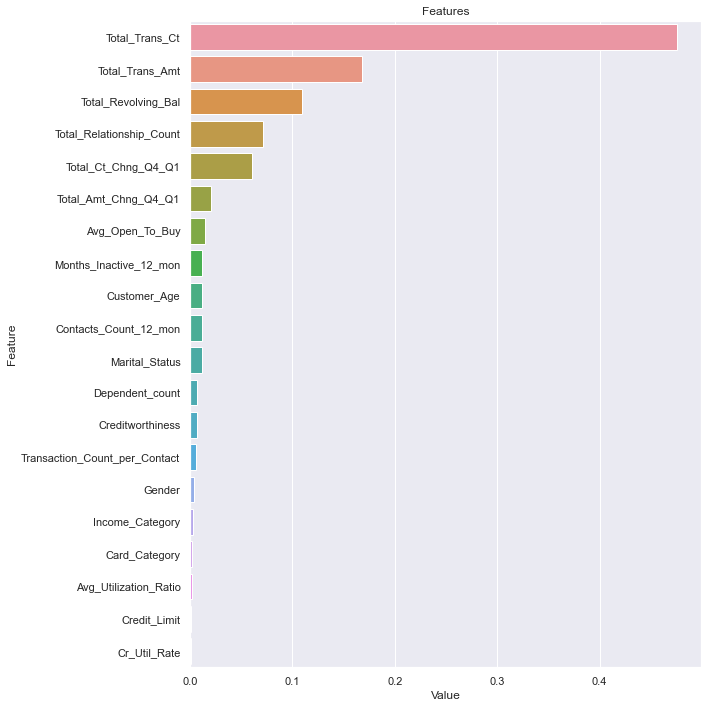

In [49]:
plot_importance(cart_final, X, num=20)